# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [1]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

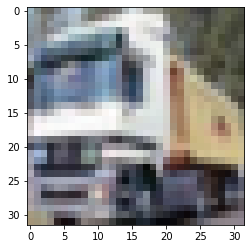

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [3]:
plt.imshow(x_train[1,:])
plt.show()

print(y_train[1])

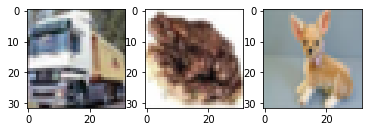

In [4]:
f, axs = plt.subplots(1,3);
axs[0].imshow(x_train[1,:])
axs[1].imshow(x_train[125,:])
axs[2].imshow(x_train[852,:])

In [5]:
#Build and train AlexNet
from tensorflow.keras import layers

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding="same", input_shape=x_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), activation='relu', padding="same"),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
    
])

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=0.01), metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 96)        2688      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 256)       221440    
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 384)         8

In [8]:
#train
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 27s 15ms/step - loss: 1.7308 - accuracy: 0.3755
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4023 - accuracy: 0.4994
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3348 - accuracy: 0.5252
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3068 - accuracy: 0.5384
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2716 - accuracy: 0.5509
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2523 - accuracy: 0.5541
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2408 - accuracy: 0.5610
Epoch 8/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2253 - accuracy: 0.5643
Epoch 9/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2210 - accuracy: 0.5660
Epoch 10/10
1563/1563 [==============================] - 24s 15m

In [9]:
#test
test = model.evaluate(x_test, y_test)
print('Test accuracy:', test[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.1502 - accuracy: 0.5890
Test accuracy: 0.5889999866485596
